In [1]:
import pandas as pd

# Assignment 1: Groupby

Can you return a table containing the top 10 stores by total transactions in the data?

Make sure they’re sorted from highest to lowest.

Thanks!

In [12]:
# Read in transactions data -- parse dates specified here for help with later problem
transactions = pd.read_csv("../Desktop/retail/transactions.csv", parse_dates=["date"])
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [10]:
store_transactions = transactions.groupby('store_nbr')['transactions'].sum().reset_index()
top_stores = store_transactions.sort_values(by='transactions', ascending=False).head(10)
print(top_stores)

    store_nbr  transactions
43         44       7273093
46         47       6535810
44         45       6201115
45         46       5990113
2           3       5366350
47         48       5107785
7           8       4637971
48         49       4574103
49         50       4384444
10         11       3972488


# Assignment 2: Groupby Multiple Columns

Can you get me the total transactions by store and month? 

Sort the table from first month to last, then by highest transactions to lowest within each month. 


In [13]:
# helper code to extract month date part from date column
transactions["month"] = transactions["date"].dt.month
transactions.head()

,date,store_nbr,transactions,month
0,2013-01-01,25,770,1
1,2013-01-02,1,2111,1
2,2013-01-02,2,2358,1
3,2013-01-02,3,3487,1
4,2013-01-02,4,1922,1


In [14]:
total_transactions = transactions.groupby(['store_nbr', 'month'])['transactions'].sum().reset_index()
sorted_transactions = total_transactions.sort_values(by=['month', 'transactions'], ascending=[True, False])
print(sorted_transactions)

     store_nbr  month  transactions
516         44      1        628438
552         47      1        568824
528         45      1        538370
540         46      1        522763
24           3      1        463260
..         ...    ...           ...
383         32     12         86167
251         21     12         84128
503         42     12         76741
347         29     12         76627
263         22     12         50650

[641 rows x 3 columns]


# Assignment 3: Multi-Index DataFrames


Can you help me access rows and columns with multiple indices? I’ve been struggling with multi-index DataFrames.

Access:
* Grab Store 3, Month 1
* Then, select the column storing the mean of transactions

Fix:
* Drop the outer layer of the column Index
* Reset the row index so it is the default integer index

In [16]:
# Ross' grouped DataFrame code, run this first
grouped = (
    transactions.groupby(["store_nbr", "month"])
    .agg({"transactions": ["sum", "mean"]})
    .sort_values(by=["month", ("transactions", "sum")], ascending=[True, False])
)

In [17]:
# df grouped by store and month with two aggregation columns
grouped.head()

transactions             
                         sum         mean
store_nbr month                          
44        1           628438  4246.202703
47        1           568824  3843.405405
45        1           538370  3637.635135
46        1           522763  3532.182432
3         1           463260  3151.428571

In [18]:
store_3_month_1 = grouped.loc[(3, 1), ('transactions', 'mean')]
print(store_3_month_1)

3151.4285714285716


In [19]:
grouped.columns = grouped.columns.droplevel(0)
print(grouped)

                    sum         mean
store_nbr month                     
44        1      628438  4246.202703
47        1      568824  3843.405405
45        1      538370  3637.635135
46        1      522763  3532.182432
3         1      463260  3151.428571
...                 ...          ...
32        12      86167   718.058333
21        12      84128  1402.133333
42        12      76741  1279.016667
29        12      76627  1277.116667
22        12      50650   844.166667

[641 rows x 2 columns]


In [20]:
grouped_reset = grouped.reset_index()
print(grouped_reset)

     store_nbr  month     sum         mean
0           44      1  628438  4246.202703
1           47      1  568824  3843.405405
2           45      1  538370  3637.635135
3           46      1  522763  3532.182432
4            3      1  463260  3151.428571
..         ...    ...     ...          ...
636         32     12   86167   718.058333
637         21     12   84128  1402.133333
638         42     12   76741  1279.016667
639         29     12   76627  1277.116667
640         22     12   50650   844.166667

[641 rows x 4 columns]


# Assignment 4: The Agg Method

Calculate the mean of target met by store, and the sum of bonuses to be paid to each store.

Sort them by highest to lowest bonus payout.

Then, do the same for day of week and month.

In [22]:
# Recreate table from section 3
transactions = transactions.assign(
    target_pct=transactions["transactions"] / 2500,
    met_target=(transactions["transactions"] / 2500) >= 1,
    bonus_payable=((transactions["transactions"] / 2500) >= 1) * 100,
    month=transactions.date.dt.month,
    day_of_week=transactions.date.dt.dayofweek,
)
transactions.head()

,date,store_nbr,transactions,month,target_pct,met_target,bonus_payable,day_of_week
0,2013-01-01,25,770,1,0.3080,False,0,1
1,2013-01-02,1,2111,1,0.8444,False,0,2
2,2013-01-02,2,2358,1,0.9432,False,0,2
3,2013-01-02,3,3487,1,1.3948,True,100,2
4,2013-01-02,4,1922,1,0.7688,False,0,2


In [23]:
store_summary = transactions.groupby('store_nbr').agg({
    'met_target': 'mean',
    'bonus_payable': 'sum'
}).reset_index()
store_summary_sorted = store_summary.sort_values(by='bonus_payable', ascending=False)
print(store_summary_sorted)

    store_nbr  met_target  bonus_payable
46         47    0.999404         167600
43         44    0.998807         167500
44         45    0.997615         167300
2           3    0.998210         167300
45         46    0.989267         165900
7           8    0.888425         148900
47         48    0.690519         115800
48         49    0.637448         106900
49         50    0.453190          76000
10         11    0.296539          49700
33         34    0.217521          36500
23         24    0.175016          27600
8           9    0.100835          16900
37         38    0.041120           6900
51         52    0.322034           3800
50         51    0.021467           3600
5           6    0.018496           3100
1           2    0.017293           2900
24         25    0.016718           2700
19         20    0.022002           2000
3           4    0.007757           1300
30         31    0.007747           1300
6           7    0.007164           1200
0           1   

In [24]:

day_summary = transactions.groupby('day_of_week').agg({
    'met_target': 'mean',
    'bonus_payable': 'sum'
}).reset_index()


day_summary_sorted = day_summary.sort_values(by='bonus_payable', ascending=False)

print(day_summary_sorted)


month_summary = transactions.groupby('month').agg({
    'met_target': 'mean',
    'bonus_payable': 'sum'
}).reset_index()


month_summary_sorted = month_summary.sort_values(by='bonus_payable', ascending=False)

print(month_summary_sorted)


   day_of_week  met_target  bonus_payable
5            5    0.222204         266400
6            6    0.204001         241700
4            4    0.179007         213000
0            0    0.160214         191600
2            2    0.160572         191000
1            1    0.146299         175500
3            3    0.142077         169100
    month  met_target  bonus_payable
11     12    0.255640         154100
4       5    0.170792         131800
2       3    0.169461         130400
3       4    0.174469         129700
6       7    0.162486         126300
1       2    0.174230         121700
5       6    0.161706         121700
7       8    0.174189         120800
0       1    0.163723         119600
10     11    0.163943          98300
9      10    0.158450          97700
8       9    0.162281          96200


# Assignment 4: Transform

Calculate the mean of transactions by store number and day of week while keeping row numbers. 

Then compare the performance of each row to its day of week average. (difference between transactions and daily avg)

In [31]:
transactions['mean_transactions'] = transactions.groupby(['store_nbr', 'day_of_week'])['transactions'].transform('mean')
transactions['difference'] = transactions['transactions'] - transactions['mean_transactions']
transactions.reset_index()
print(transactions)

       index       date  store_nbr  transactions  month  target_pct  \
0          0 2013-01-01         25           770      1      0.3080   
1          1 2013-01-02          1          2111      1      0.8444   
2          2 2013-01-02          2          2358      1      0.9432   
3          3 2013-01-02          3          3487      1      1.3948   
4          4 2013-01-02          4          1922      1      0.7688   
...      ...        ...        ...           ...    ...         ...   
83483  83483 2017-08-15         50          2804      8      1.1216   
83484  83484 2017-08-15         51          1573      8      0.6292   
83485  83485 2017-08-15         52          2255      8      0.9020   
83486  83486 2017-08-15         53           932      8      0.3728   
83487  83487 2017-08-15         54           802      8      0.3208   

       met_target  bonus_payable  day_of_week  mean_transactions  difference  
0           False              0            1         740.245690   2

# Assignment 5: Pivot

Pivot transactions with store number as index, columns day of week, with the sum of bonus payable as cells.

Filter to stores that had a non-zero bonus payable and create a heatmap.

Then unpivot (melt) the table so we have one row for each store and day of the week with the corresponding total owed. 


In [32]:
# Use transactions table (ok if includes columns from assignment 4 or not)
transactions.head()

,index,date,store_nbr,transactions,month,target_pct,met_target,bonus_payable,day_of_week,mean_transactions,difference
0,0,2013-01-01,25,770,1,0.3080,False,0,1,740.245690,29.754310
1,1,2013-01-02,1,2111,1,0.8444,False,0,2,1870.782427,240.217573
2,2,2013-01-02,2,2358,1,0.9432,False,0,2,1952.652720,405.347280
3,3,2013-01-02,3,3487,1,1.3948,True,100,2,3142.682008,344.317992
4,4,2013-01-02,4,1922,1,0.7688,False,0,2,1499.569038,422.430962


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

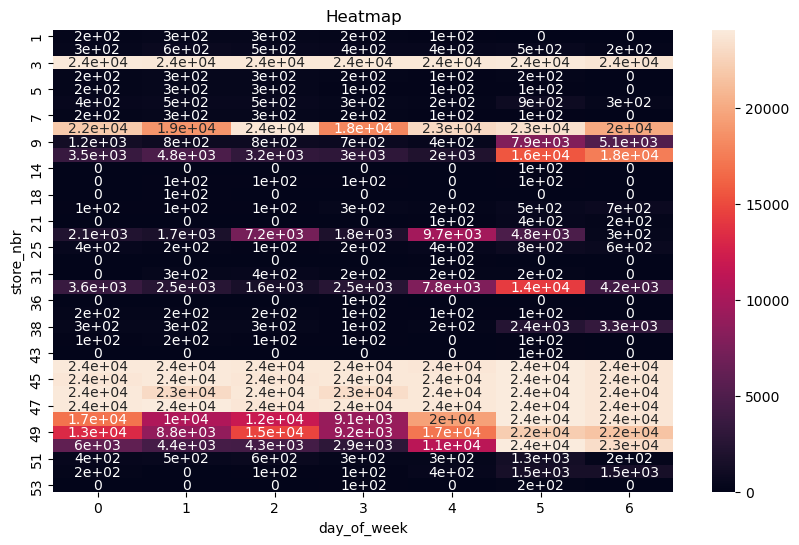

     store_nbr day_of_week  total_bonus_payable
0            1           0                  200
1            2           0                  300
2            3           0                24000
3            4           0                  200
4            5           0                  200
..         ...         ...                  ...
240         49           6                21600
241         50           6                23200
242         51           6                  200
243         52           6                 1500
244         53           6                    0

[245 rows x 3 columns]


In [36]:
pivot_df = transactions.pivot_table(index='store_nbr', columns='day_of_week', values='bonus_payable', aggfunc='sum')
filtered_pivot_df = pivot_df.loc[(pivot_df != 0).any(axis=1)]
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_pivot_df, annot=True)
plt.title('Heatmap')
plt.show()
melted_df = filtered_pivot_df.reset_index().melt(id_vars='store_nbr', var_name='day_of_week', value_name='total_bonus_payable')
print(melted_df)